<h2 align="center"> Московский Государственный Университет имени М. В. Ломоносова </h2>
<h2 align="center"> Факультет вычислительной математики и кибернетики </h2>
<h3 align="center"> Кафедра Математических Методов Пронозирования </h3>


### Практикум на ЭВМ. Задание №3.
# Метод опорных векторов

Выполнил студент 317 группы *Гарипов Тимур*

---

## 1. Цели задания

В задании требовалось ознакомиться с методом опорных векторов (SVM). Реализовать несколько методов решения задачи SVM и провести их исследование.

---

## 2. Постановка задач оптимизации

Введём следующие обозначения:
* $N$ &mdash; число объектов в обучающей выборке.
* $D$ &mdash; размерность признакового пространства.
* $\pmb{x}_n \in \mathbb{R}^D$ &mdash; вектор признаков объекта n.
* $y_n \in \{-1, 1\}$ &mdash; правльный ответ для объекта n.

### Прямая задача SVM

$$
    \min\limits_{\pmb{w}, \pmb{\xi}} \frac{1}{2} {||\pmb{w}||}^2 + C \sum\limits_{n = 1}^N \xi_n         
$$
\begin{aligned}
    s.t. \quad & y_n(\pmb{w}^T \pmb{x}_n + w_0) \geqslant 1, \quad & n = 1, 2, \dots, N \\
               & \xi_n \geqslant 0, \quad & n = 1, 2, \dots, N
\end{aligned}



### Прямая задача SVM без ограничений
$$
    \min\limits_{\pmb{w}, \pmb{\xi}} \frac{1}{2} {||\pmb{w}||}^2 + C \sum\limits_{n = 1}^N \max\{0, 1 - y_n(\pmb{w}^T \pmb{x}_n + w_0) \}
$$

### Двойственная задача SVM

$$
    \max\limits_{\pmb{a}} \sum\limits_{i=1}^N a_n - \frac{1}{2}\sum\limits_{n=1}^N \sum\limits_{m=1}^N
    a_n a_m y_n y_m k(\pmb{x}_n, \pmb{x}_m)    
$$

\begin{aligned}
    s.t. \quad & 0 \leqslant a_n \leqslant C, \quad n = 1, 2, \dots, N \\
               & \sum\limits_{n=1}^N a_n y_n = 0
\end{aligned}


Где $k(\pmb{x}_n, \pmb{x}_m)$ &mdash; ядровая функция.

---
## 3. Методы решения задачи SVM. 
В модуле `SVMmodule.py` реализованы следующие методы решения задачи SVM:

* Метод внутренней точки для решения прямой задачи. Использована библиотека `cvxopt`, метод `cvxopt.solvers.qp`. Функция `svm_qp_primal_solver`.


* Метод внутренней точки для решения двойственной задачи. Использована библиотека `cvxopt`, метод `cvxopt.solvers.qp`. Функция `svm_qp_dual_solver`.


* Метод субградиентного спуска для решения прямой задачи без ограничений, а также его стохастический вариант. Реализован самостоятельно. Функция `svm_subgradient_solver`.


* Метод, используемый в библиотеке `liblinear`. Использованы биндинги из библиотеки `scikitlearn`, класс `sklearn.svm.LinearSVC`. Функция `svm_liblinear_solver`.


* Метод, используемый в библиотеке `libsvm`. Использованы биндинги из библиотеки `scikitlearn`, класс `sklearn.svm.SVC`. Функция `svm_libsvm_solver`.

### Вывод формулы для субградиента функционала в прямой задаче SVM без ограничений

Перепишем исследуемый функционал следующим образом:

$$
Q(\pmb{w}, w_0) = \frac{1}{2} {||\pmb{w}||}^2 + C \sum\limits_{n = 1}^N \max\{0, 1 - y_n(\pmb{w}^T \pmb{x}_n +w_0)\} = \sum\limits_{n = 1}^N \left[ \frac{1}{2N} {||\pmb{w}||}^2 + C \max\{0, 1 - y_n(\pmb{w}^T \pmb{x}_n + w_0)\} \right] = \sum\limits_{n = 1}^N f_n(\pmb{w}, w_0),
$$

где $f_n(\pmb{w}, w_0) = \frac{1}{2N} {||\pmb{w}||}^2 + C \max\{0, 1 - y_n(\pmb{w}^T \pmb{x}_n + w_0)\}$.

Производная функции $f_n(\pmb{w}, w_0)$ существует во всех точках кроме тех, в которых $1 - y_n(\pmb{w}^T \pmb{x}_n + w_0) = 0$, в этом случае придется использовать субградиент вместо градиента.

Покажем, что субградиентом функции $\max\{0, z\}$ в точке $z=0$ является любое число $\alpha \in [0, 1]$. Действительно, для всех $z \in \mathbb{R}$ выполнено неравентсво $\alpha z \leqslant \max\{0, z\}$, при $\alpha \in [0, 1]$. Далее будем полагать $\left. \frac{d \max\{0, z\}}{dz} \right|_{z=0} = 1$.

Теперь можно вычислить субградиент функции $f_n(\pmb{w}, w_0)$:

$$
    \nabla_{\pmb{w}} [ f_n(\pmb{w}, w_0) ] = \frac{1}{N} \pmb{w} - C
    \left\{ 
        \begin{aligned} 
            y_n \pmb{x}_n, \quad & 1 - y_n(\pmb{w}^T \pmb{x}_n + w_0) \geqslant 0 \\
            0, \quad & 1 - y_n(\pmb{w}^T \pmb{x}_n + w_0) < 0
        \end{aligned} 
    \right.
$$

$$
    \frac{\partial f_n(\pmb{w}, w_0)}{\partial w_0} = - C \left\{
        \begin{aligned}
            y_n, \quad & 1 - y_n(\pmb{w}^T \pmb{x}_n + w_0) \geqslant 0 \\
            0, \quad & 1 - y_n(\pmb{w}^T \pmb{x}_n + w_0) < 0
        \end{aligned}
    \right.
$$

Субградиент функционала $Q(\pmb{w}, w_0)$ вычисляется как сумма субградиентов функций $f_n(\pmb{w}, w_0)$.

--- 
## 4. Исследовательская часть

In [104]:
import numpy as np
import matplotlib.pyplot as plt
import SVMmodule
import matplotlib
from importlib import reload
import sklearn.cross_validation
import sklearn.grid_search
import sklearn.svm
import warnings
warnings.filterwarnings('ignore')
reload(SVMmodule)
%matplotlib inline

### 4.1. Исследование времени работы и точности методов.

Исследуется зависимость времени работы от размерности признакового пространства и числа объектов в обучающей выборке. Также методы сравниваются по полученным значениям целевой функции.

In [205]:
import sys
reload(SVMmodule) 
functions = [SVMmodule.svm_qp_primal_solver,
             SVMmodule.svm_qp_dual_solver,
             SVMmodule.svm_subgradient_solver,
             SVMmodule.svm_liblinear_solver,
             SVMmodule.svm_libsvm_solver]
C = 1.0
sep = 0.42
for D in [2, 15, 50, 100]:
    for N in [200, 500, 1000, 1500]:                
        print('|{0}|{1}|'.format(D, N), end='')
        X, y = SVMmodule.generate_data(N, D, sep)
        for f in functions:
            res = f(X, y, C, max_iter=1000)            
            print(' {0:.2g} |'.format(res['time']), end='')
            sys.stdout.flush()
        print()        

|2|200| 0.58 | 0.58 | 0.47 | 0.012 | 0.003 |
|2|500| 6.5 | 6.6 | 1 | 0.027 | 0.0062 |
|2|1000| 74 | 75 | 1.2 | 0.037 | 0.027 |
|2|1500| 2.4e+02 | 2.5e+02 | 2.1 | 0.059 | 0.069 |
|15|200| 0.56 | 0.62 | 0.82 | 0.017 | 0.0049 |
|15|500| 8.5 | 8.3 | 1.5 | 0.063 | 0.024 |
|15|1000| 65 | 68 | 2.8 | 0.11 | 0.064 |
|15|1500| 3.1e+02 | 3e+02 | 3.9 | 0.16 | 0.11 |
|50|200| 0.82 | 0.67 | 1.3 | 0.044 | 0.0083 |
|50|500| 9.1 | 9 | 2.8 | 0.098 | 0.04 |
|50|1000| 78 | 70 | 5.4 | 0.24 | 0.14 |
|50|1500| 2.4e+02 | 2.3e+02 | 8.1 | 0.41 | 0.27 |
|100|200| 0.92 | 0.61 | 1.9 | 0.099 | 0.02 |
|100|500| 9.6 | 7.9 | 4.8 | 0.21 | 0.071 |
|100|1000| 78 | 70 | 9.7 | 0.35 | 0.2 |
|100|1500| 2.5e+02 | 2.3e+02 | 15 | 0.6 | 0.47 |


<h3 align="center" style="padding-left: 70px"> Время работы (в секундах) </h3>

|$D$   | $N$  |`qp_primal`    |`qp_dual`    |`subgradient`|`liblinear`|`libsvm`|
|:----:|:----:|:-------------:|:-----------:|:-----------:|:---------:|:------:|
|2|200| 0.58 | 0.58 | 0.47 | 0.012 | 0.003 |
|2|500| 6.5 | 6.6 | 1 | 0.027 | 0.0062 |
|2|1000| 74 | 75 | 1.2 | 0.037 | 0.027 |
|2|1500| 240 | 250 | 2.1 | 0.059 | 0.069 |
||||||||
|15|200| 0.56 | 0.62 | 0.82 | 0.017 | 0.0049 |
|15|500| 8.5 | 8.3 | 1.5 | 0.063 | 0.024 |
|15|1000| 65 | 68 | 2.8 | 0.11 | 0.064 |
|15|1500| 310 | 300 | 3.9 | 0.16 | 0.11 |
||||||||
|50|200| 0.82 | 0.67 | 1.3 | 0.044 | 0.0083 |
|50|500| 9.1 | 9 | 2.8 | 0.098 | 0.04 |
|50|1000| 78 | 70 | 5.4 | 0.24 | 0.14 |
|50|1500| 240 | 230 | 8.1 | 0.41 | 0.27 |
||||||||
|100|200| 0.92 | 0.61 | 1.9 | 0.099 | 0.02 |
|100|500| 9.6 | 7.9 | 4.8 | 0.21 | 0.071 |
|100|1000| 78 | 70 | 9.7 | 0.35 | 0.2 |
|100|1500| 250 | 230 | 15 | 0.6 | 0.47 |

Эксперименты показывают, что методы внутренней точки работают заметно дольше остальных методов, несмотря на то, что  для нахождения оптимального решения им требуется порядка 20 итераций.

Ниже построен график, отображающий отклонение найденного решения от оптимального в зависимости от максимального
числа итераций. Использовалась выборка с параметрами $N = 800$, $D = 50$. За оптимальное принято решение, найденное методом внутренней точки.

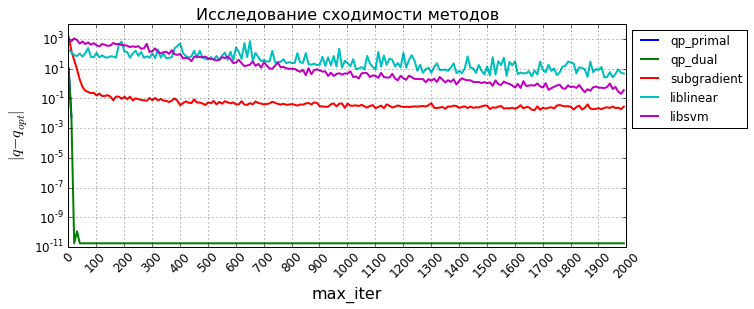

In [201]:
reload(SVMmodule) 
import sys
import warnings
warnings.filterwarnings('ignore')

functions = [SVMmodule.svm_qp_primal_solver,
             SVMmodule.svm_qp_dual_solver,
             SVMmodule.svm_subgradient_solver,
             SVMmodule.svm_liblinear_solver,
             SVMmodule.svm_libsvm_solver]

N = 600
D = 20
C = 1
X, y = SVMmodule.generate_data(N, D, 0.4)

iters = np.arange(1, 2000, 10)
labels = ['qp_primal', 'qp_dual', 'subgradient', 'liblinear', 'libsvm']
res = SVMmodule.svm_qp_primal_solver(X, y, C, max_iter=1000)
ans = SVMmodule.compute_primal_objective(X, y, res['w0'], res['w'], C)

plt.figure(figsize=(10, 4))

for i, f in enumerate(functions):    
    val = []
    if (i == 2):
        res = f(X, y, 1, max_iter=int(iters[-1]))
        val = res['objective_curve']
        val = val[np.minimum(iters, val.size - 1)]
    else:
        for max_iter in iters:
            if (i < 2) and (max_iter > 50):
                q = val[-1]
            else:
                res = f(X, y, 1, max_iter=int(max_iter))
                q = SVMmodule.compute_primal_objective(X, y, res['w0'], res['w'], C)                        
            val.append(q)
    val = np.array(val)
    plt.semilogy(iters, np.abs(ans - val), label=labels[i], linewidth=2)

plt.title('Исследование сходимости методов', fontsize=16)
plt.ylabel('$|q - q_{opt}|$', fontsize=16)
plt.xlabel('max_iter', fontsize=16)
plt.xticks(np.arange(0, 2001, 100), fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid()
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()
    

Графики для методов `qp_primal` и `qp_dual` совпадают. 

По скорости сходимости и точности найденного решения методы из библиотеки `cvxopt` заметно операжают остальные методы (но требуют значительно больше времени).  

Методу `libsvm`, по всей видимости, требуется больше итараций для достижения оптимума. Но число итераций можно сильно увеличить, так как этот метод является самым быстрым.

Как оказалось метод `liblinear` некорректно сравнивать с другими методами, так как этот метод решает другую задачу оптимизации. (В этом методе для оптимизации по $w_0$ в ветор признаков вносится фиктивный константный признак, из-за чего $w_0$ вносит вклад в норму вектора $\pmb{w}$.)

### 4.2. Исследование времени работы и точности методов, использующих RBF ядро.

In [206]:
import sys
reload(SVMmodule) 
functions = [SVMmodule.svm_qp_dual_solver,             
             SVMmodule.svm_libsvm_solver]
C = 1.0
gamma = 0.01
sep = 0.42
for  D in [2, 15, 50, 100]:
    for N in [200, 500, 1000, 1500]:                
        print('|{0}|{1}|'.format(D, N), end='')
        X, y = SVMmodule.generate_data(N, D, sep)
        for f in functions:
            res = f(X, y, C, max_iter=1000, gamma=gamma)            
            print(' {0:.2g}|'.format(res['time']), end='')
            sys.stdout.flush()
        print()        

|2|200| 0.69| 0.0052|
|2|500| 8.5| 0.019|
|2|1000| 58| 0.064|
|2|1500| 2e+02| 0.15|
|15|200| 0.62| 0.0082|
|15|500| 6.8| 0.031|
|15|1000| 54| 0.094|
|15|1500| 1.8e+02| 0.2|
|50|200| 0.52| 0.018|
|50|500| 5.8| 0.071|
|50|1000| 42| 0.22|
|50|1500| 1.5e+02| 0.43|
|100|200| 0.46| 0.055|
|100|500| 5.3| 0.19|
|100|1000| 38| 0.53|
|100|1500| 1.2e+02| 0.98|


<h3 align="center" style="padding-left: 70px"> Время работы (в секундах) </h3>

|$D$   | $N$  |`qp_dual`    |`libsvm`|
|:----:|:----:|:-----------:|:------:|
|2|200| 0.69| 0.0052|
|2|500| 8.5| 0.019|
|2|1000| 58| 0.064|
|2|1500| 200| 0.15|
|||||
|15|200| 0.62| 0.0082|
|15|500| 6.8| 0.031|
|15|1000| 54| 0.094|
|15|1500| 180| 0.2|
|||||
|50|200| 0.52| 0.018|
|50|500| 5.8| 0.071|
|50|1000| 42| 0.22|
|50|1500| 150| 0.43|
|||||
|100|200| 0.46| 0.055|
|100|500| 5.3| 0.19|
|100|1000| 38| 0.53|
|100|1500| 120| 0.98|

Ниже построен график, отображающий отклонение найденного решения от оптимального в зависимости от максимального
числа итераций. Использовалась выборка с параметрами $N = 1500$, $D = 4$. За оптимальное принято решение, найденное методом внутренней точки.

     pcost       dcost       gap    pres   dres
 0:  3.3427e+03 -1.5777e+05  3e+05  2e-01  9e-14
 1:  2.1476e+03 -2.0038e+04  4e+04  2e-02  1e-13
 2:  7.0220e+02 -4.2460e+03  6e+03  2e-03  8e-14
 3:  2.6071e+02 -2.8870e+03  4e+03  1e-03  7e-14
 4: -9.2247e+01 -1.6751e+03  2e+03  4e-04  7e-14
 5: -2.0043e+02 -1.4392e+03  1e+03  3e-04  7e-14
 6: -3.1469e+02 -1.1214e+03  8e+02  1e-04  7e-14
 7: -3.6679e+02 -9.6548e+02  6e+02  3e-05  8e-14
 8: -4.4047e+02 -7.4252e+02  3e+02  1e-05  8e-14
 9: -4.7575e+02 -6.4573e+02  2e+02  5e-06  9e-14
10: -5.0282e+02 -5.7099e+02  7e+01  1e-06  9e-14
11: -5.1723e+02 -5.3736e+02  2e+01  6e-08  1e-13
12: -5.2115e+02 -5.3052e+02  9e+00  5e-09  1e-13
13: -5.2371e+02 -5.2674e+02  3e+00  1e-09  1e-13
14: -5.2475e+02 -5.2531e+02  6e-01  2e-13  1e-13
15: -5.2501e+02 -5.2502e+02  1e-02  2e-13  1e-13
16: -5.2501e+02 -5.2501e+02  1e-04  3e-13  1e-13
Optimal solution found.


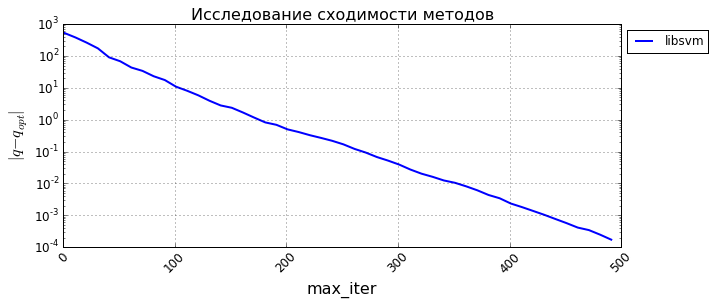

In [14]:
reload(SVMmodule) 
import sys
import warnings
warnings.filterwarnings('ignore')

functions = [SVMmodule.svm_libsvm_solver]

N = 1500
D = 4
C = 20.0
gamma = 0.2
X, y = SVMmodule.generate_data(N, D, 0.6)

iters = np.arange(1, 500, 10)
labels = ['libsvm']
res = SVMmodule.svm_qp_dual_solver(X, y, C, max_iter=1000, gamma=gamma, verbose=True)
ans = SVMmodule.compute_dual_objective(X, y, res['A'], C, gamma)
plt.figure(figsize=(10, 4))

for i, f in enumerate(functions):
    val = []    
    for max_iter in iters:        
        res = f(X, y, C, max_iter=int(max_iter), gamma=gamma)
        q = SVMmodule.compute_dual_objective(X, y, res['A'], C, gamma)        
        val.append(q)        
    val = np.array(val)
    plt.semilogy(iters, np.abs(ans - val), label=labels[i], linewidth=2)

plt.title('Исследование сходимости методов', fontsize=16)
plt.ylabel('$|q - q_{opt}|$', fontsize=16)
plt.xlabel('max_iter', fontsize=16)
plt.xticks(np.arange(0, 501, 100), fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid()
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

В случае RBF ядра метод `libsvm` стал сходиться гораздо лучше. 
Метод `qp_dual` сходится к оптимальному решению за 16 итераций.

### 4.3. Подбор оптимальных значений C и $\gamma$

#### Случай плохо разделимых данных

In [83]:
reload(SVMmodule)

N = 6000
D = 20
X, y = SVMmodule.generate_data(N, D, sep=0.25)
X_train, X_test, y_train, y_test = sklearn.cross_validation.train_test_split(X, y, train_size=4000, random_state=33)

g_vals = np.logspace(-9, 3, 13)
C_vals = np.logspace(-4, 9, 14)

cv_score = np.zeros((g_vals.size, C_vals.size))
test_score = np.zeros((g_vals.size, C_vals.size))

clf = sklearn.svm.SVC(tol=1e-6, kernel='rbf', max_iter=400)

params = {'gamma': g_vals, 'C': C_vals}

grid = sklearn.grid_search.GridSearchCV(estimator=clf, n_jobs=3, param_grid=params, cv=3, verbose=True)

grid.fit(X_train, y_train)


for item in grid.grid_scores_:        
    gamma = item[0]['gamma']
    C = item[0]['C']
    g_id = np.where(g_vals == gamma)[0]
    C_id = np.where(C_vals == C)[0]
    cv_score[g_id, C_id] = item[1]
    clf = sklearn.svm.SVC(tol=1e-6, kernel='rbf', max_iter=400, gamma=gamma, C=C)
    clf.fit(X_train, y_train)
    y = clf.predict(X_test)    
    score = np.sum(y == y_test) * 1.0 / y_test.size
    #print(item[1], score)
    test_score[g_id, C_id] = score

    


Fitting 3 folds for each of 182 candidates, totalling 546 fits


[Parallel(n_jobs=3)]: Done   1 jobs       | elapsed:    0.5s
[Parallel(n_jobs=3)]: Done  50 jobs       | elapsed:    9.7s
[Parallel(n_jobs=3)]: Done 200 jobs       | elapsed:   36.5s
[Parallel(n_jobs=3)]: Done 450 jobs       | elapsed:  1.3min
[Parallel(n_jobs=3)]: Done 542 out of 546 | elapsed:  1.5min remaining:    0.7s
[Parallel(n_jobs=3)]: Done 546 out of 546 | elapsed:  1.5min finished


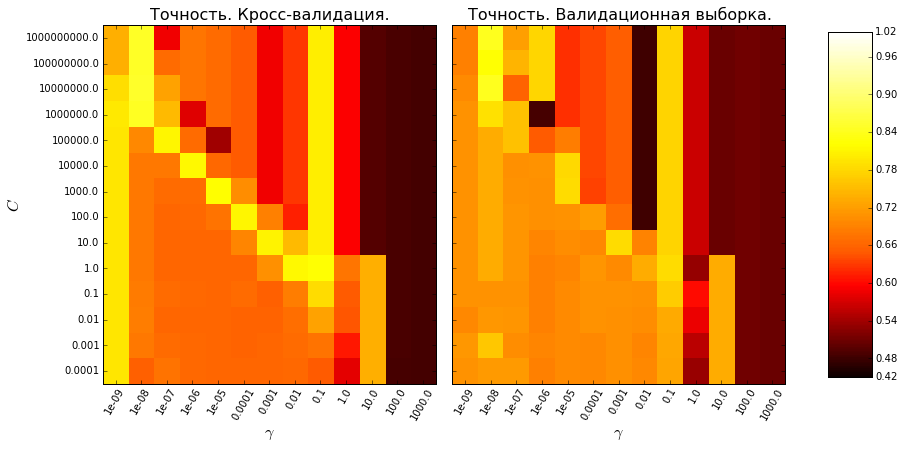

Best: {'C': 10000000.0, 'gamma': 1e-08} 0.8515


In [84]:
from matplotlib.colors import Normalize
class MidpointNormalize(Normalize):
    
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))
mid = 0.65
fig, x = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
fig.subplots_adjust(left= 0.01, right=0.8, bottom=0.01, top=0.99, wspace=0.05)
img = x[0].imshow(cv_score.T[::-1,:], interpolation='nearest', cmap=plt.cm.hot,
           norm=MidpointNormalize(vmin=0.45, midpoint=mid, vmax=1.0), extent=[0, g_vals.size, 0, C_vals.size])
x[0].set_title('Точность. Кросс-валидация.', fontsize=16)
x[0].set_xlabel('$\gamma$', fontsize=16)
x[0].set_xticks(list(np.arange(0.5, g_vals.size + 0.5, 1.0)))
x[0].set_xticklabels(list(g_vals), rotation=60)
x[0].set_ylabel('$C$', fontsize=16)
x[0].set_yticks(list(np.arange(0.5, C_vals.size + 0.5, 1.0)))
x[0].set_yticklabels(list(C_vals))

x[1].imshow(test_score.T[::-1,:], interpolation='nearest', cmap=plt.cm.hot,
           norm=MidpointNormalize(vmin=0.45, midpoint=mid, vmax=1.0), extent=[0, g_vals.size, 0, C_vals.size])
x[1].set_title('Точность. Валидационная выборка.', fontsize=16)
x[1].set_xticks(list(np.arange(0.5, g_vals.size + 0.5, 1.0)))
x[1].set_xlabel('$\gamma$', fontsize=16)
x[1].set_xticklabels(list(g_vals), rotation=60)
#x[1].set_ylabel('$C$', fontsize=16)
x[1].set_yticks(list(np.arange(0.5, C_vals.size + 0.5, 1.0)))
x[1].set_yticklabels([''] * C_vals.size)


cbar_ax = fig.add_axes([0.85, 0.2, 0.05, 0.6])
fig.colorbar(img, cax=cbar_ax)


plt.show()
print('Best:', grid.best_params_, grid.best_score_)

При $C \geqslant 10$ точность значительно падает. Для некоторых значений $\gamma$ увеличение параметра $C$ приводит к переобучению модели.

#### Случай хорошо разделимых данных

In [81]:
reload(SVMmodule)
N = 6000
D = 20
X, y = SVMmodule.generate_data(N, D, sep=0.5)
X_train, X_test, y_train, y_test = sklearn.cross_validation.train_test_split(X, y, train_size=4000, random_state=33)

g_vals = np.logspace(-9, 3, 13)
C_vals = np.logspace(-4, 9, 14)

cv_score = np.zeros((g_vals.size, C_vals.size))
test_score = np.zeros((g_vals.size, C_vals.size))

clf = sklearn.svm.SVC(tol=1e-6, kernel='rbf', max_iter=400)

params = {'gamma': g_vals, 'C': C_vals}

grid = sklearn.grid_search.GridSearchCV(estimator=clf, n_jobs=3, param_grid=params, cv=3, verbose=True)

grid.fit(X_train, y_train)


for item in grid.grid_scores_:        
    gamma = item[0]['gamma']
    C = item[0]['C']
    g_id = np.where(g_vals == gamma)[0]
    C_id = np.where(C_vals == C)[0]
    cv_score[g_id, C_id] = item[1]
    clf = sklearn.svm.SVC(tol=1e-6, kernel='rbf', max_iter=400, gamma=gamma, C=C)
    clf.fit(X_train, y_train)
    y = clf.predict(X_test)    
    score = np.sum(y == y_test) * 1.0 / y_test.size
    #print(item[1], score)
    test_score[g_id, C_id] = score

Fitting 3 folds for each of 182 candidates, totalling 546 fits


[Parallel(n_jobs=3)]: Done   1 jobs       | elapsed:    0.6s
[Parallel(n_jobs=3)]: Done  50 jobs       | elapsed:    9.0s
[Parallel(n_jobs=3)]: Done 200 jobs       | elapsed:   34.1s
[Parallel(n_jobs=3)]: Done 450 jobs       | elapsed:  1.1min
[Parallel(n_jobs=3)]: Done 542 out of 546 | elapsed:  1.2min remaining:    0.5s
[Parallel(n_jobs=3)]: Done 546 out of 546 | elapsed:  1.2min finished


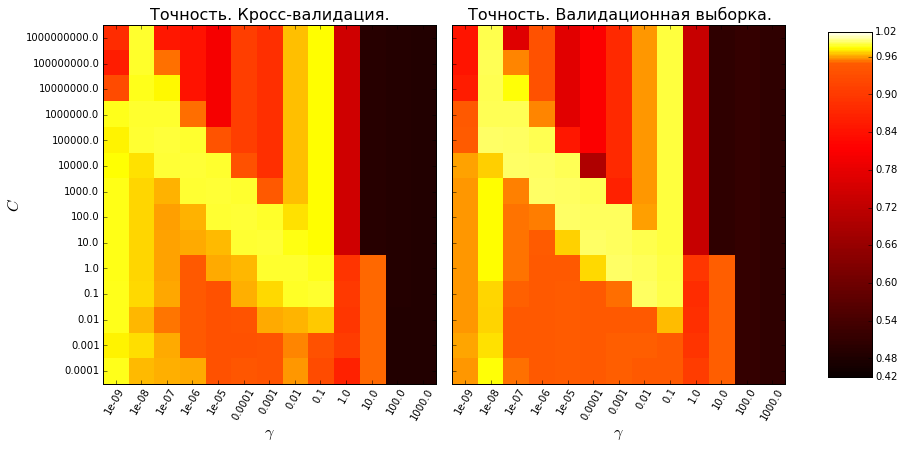

Best: {'C': 100000.0, 'gamma': 9.9999999999999995e-08} 0.98025


In [82]:
from matplotlib.colors import Normalize
class MidpointNormalize(Normalize):
    
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))
mid = 0.95
fig, x = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
fig.subplots_adjust(left= 0.01, right=0.8, bottom=0.01, top=0.99, wspace=0.05)
img = x[0].imshow(cv_score.T[::-1,:], interpolation='nearest', cmap=plt.cm.hot,
           norm=MidpointNormalize(vmin=0.45, midpoint=mid, vmax=1.0), extent=[0, g_vals.size, 0, C_vals.size])
x[0].set_title('Точность. Кросс-валидация.', fontsize=16)
x[0].set_xlabel('$\gamma$', fontsize=16)
x[0].set_xticks(list(np.arange(0.5, g_vals.size + 0.5, 1.0)))
x[0].set_xticklabels(list(g_vals), rotation=60)
x[0].set_ylabel('$C$', fontsize=16)
x[0].set_yticks(list(np.arange(0.5, C_vals.size + 0.5, 1.0)))
x[0].set_yticklabels(list(C_vals))

x[1].imshow(test_score.T[::-1,:], interpolation='nearest', cmap=plt.cm.hot,
           norm=MidpointNormalize(vmin=0.45, midpoint=mid, vmax=1.0), extent=[0, g_vals.size, 0, C_vals.size])
x[1].set_title('Точность. Валидационная выборка.', fontsize=16)
x[1].set_xticks(list(np.arange(0.5, g_vals.size + 0.5, 1.0)))
x[1].set_xlabel('$\gamma$', fontsize=16)
x[1].set_xticklabels(list(g_vals), rotation=60)
#x[1].set_ylabel('$C$', fontsize=16)
x[1].set_yticks(list(np.arange(0.5, C_vals.size + 0.5, 1.0)))
x[1].set_yticklabels([''] * C_vals.size)


cbar_ax = fig.add_axes([0.85, 0.2, 0.05, 0.6])
fig.colorbar(img, cax=cbar_ax)


plt.show()
print('Best:', grid.best_params_, grid.best_score_)

В случае хорошо разделимых данных точность, оценненая по кросс-валидации, практически не отличает от точности на валидационной выборке.

### 4.4. Стратегии выбора шага в методе субградиентного спуска

In [20]:
reload(SVMmodule)
N = 1500
D = 30
C = 1.0
X, y = SVMmodule.generate_data(N, D, 0.6)
res_opt = SVMmodule.svm_qp_dual_solver(X, y, C, gamma=0)
q_opt = SVMmodule.compute_primal_objective(X, y, res_opt['w0'], res_opt['w'], C)

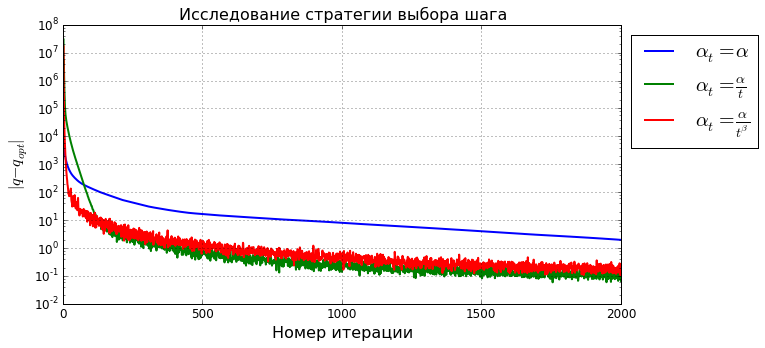

In [67]:
reload(SVMmodule)
max_iter = 2000
results = []
tol = 1e-8
results.append(SVMmodule.svm_subgradient_solver(X, y, C, max_iter=max_iter, tol=tol, alpha=0.0001, beta=0.0))
results.append(SVMmodule.svm_subgradient_solver(X, y, C, max_iter=max_iter, tol=tol, alpha=2.0, beta=1.0))
results.append(SVMmodule.svm_subgradient_solver(X, y, C, max_iter=max_iter, tol=tol, alpha=1.5, beta=0.9))

labels = ['$\\alpha_t=\\alpha$', '$\\alpha_t=\\frac{\\alpha}{t}$', '$\\alpha_t=\\frac{\\alpha}{t^{\\beta}}$']
plt.figure(figsize=(10, 5))
for i, res in enumerate(results):
    indexes = np.arange(max_iter + 1)
    cnt = res['objective_curve'].size
    target = np.abs(res['objective_curve'] - q_opt)
    plt.semilogy(np.arange(max_iter + 1), target[np.minimum(indexes, cnt - 1)], label=labels[i], linewidth=2)
plt.ylabel('$|q - q_{opt}|$', fontsize=16)
plt.xlabel('Номер итерации', fontsize=16)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title('Исследование стратегии выбора шага', fontsize=16)
plt.legend(loc="upper left", bbox_to_anchor=(1,1), fontsize=20)
plt.grid()
plt.show()

Для каждого способа выбора шага значения $\alpha$ и $\beta$ подобраны так, чтобы метод сходился как можно ближе к оптимальному решению. Видно, что, метод использующий постоянный шаг сходится гораздо медленнее. Более того, при увеличении $\alpha$ этот метод может рассходиться. Разница между остальными двумя способами не существенна.

Следует отметить, что параметры $\alpha$ и $\beta$ необходимо заново подбирать для каждой новой выборки.

### 4.5. Размер подвыборки в методе субградиентного спуска

Размер подвыборки: 0.12*N, время: 9.27192100000002 сек. Отклонение от оптимума: 8.1
Размер подвыборки: 0.25*N, время: 11.155181000000084 сек. Отклонение от оптимума: 0.88
Размер подвыборки: 0.5*N, время: 14.296341000000211 сек. Отклонение от оптимума: 0.62
Размер подвыборки: 1*N, время: 21.692261999999573 сек. Отклонение от оптимума: 0.3


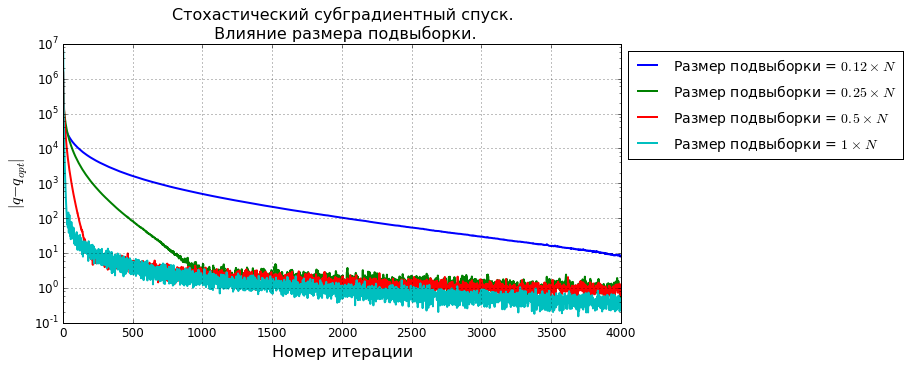

In [70]:
max_iter = 4000
tol = 1e-8
parts = np.logspace(-3.0, 0.0, 4, base=2.0)
results = []
labels = []
for part in parts:
    results.append(SVMmodule.svm_subgradient_solver(X, y, C, max_iter=max_iter, tol=tol, part=part))    
    labels.append('Размер подвыборки = ${0:.2g} \\times\\,N$'.format(part))
    q = np.abs(q_opt - results[-1]['objective_curve'][-1])
    s = 'Размер подвыборки: {0:.2g}*N, время: {1} сек. Отклонение от оптимума: {2:.2g}'
    print(s.format(part, results[-1]['time'], q))

plt.figure(figsize=(10, 5))
for i, res in enumerate(results):
    indexes = np.arange(max_iter + 1)
    cnt = res['objective_curve'].size
    target = np.abs(res['objective_curve'] - q_opt)
    plt.semilogy(np.arange(max_iter + 1), target[np.minimum(indexes, cnt - 1)], label=labels[i], linewidth=2)    
plt.ylabel('$|q - q_{opt}|$', fontsize=16)
plt.xlabel('Номер итерации', fontsize=16)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title('Стохастический субградиентный спуск.\n Влияние размера подвыборки.', fontsize=16)
plt.legend(loc="upper left", bbox_to_anchor=(1,1), fontsize=14)
plt.grid()
plt.show()

Эксперименты показывают, что уменьшение размера подвыборки позволяет уменьшить время работы метода при фиксированном числе итераций, но ценой за это является увеличение количества итераций, необходимых для достижения фиксированного отколнения от оптимума.

### 4.6. Визуализация

In [97]:
N = 800
D = 2
C = 20
gamma = 0.08

### Линейно разделимая выборка

In [87]:
X, y = SVMmodule.generate_data(N, D, 1.0)

### Решение, найденное методом qp_dual

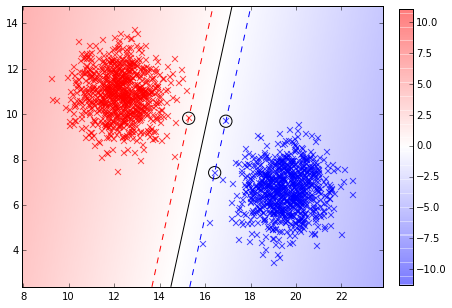

In [90]:
res = SVMmodule.svm_qp_dual_solver(X, y, C)
SVMmodule.visualize(X, y, res['w0'], res['w'], A=res['A'])

### Решение, найденное методом subgradient

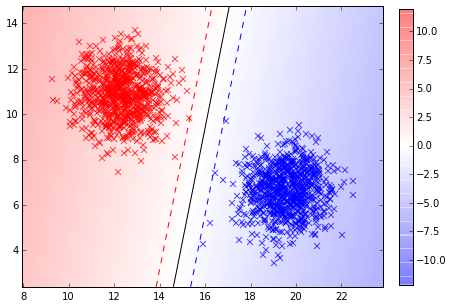

In [93]:
res = SVMmodule.svm_subgradient_solver(X, y, C, max_iter=4000)
SVMmodule.visualize(X, y, res['w0'], res['w'])

### Решение, найденное методом libsvm

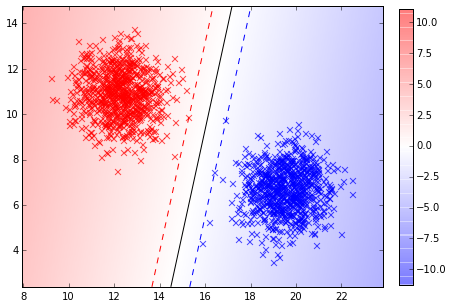

In [94]:
res = SVMmodule.svm_libsvm_solver(X, y, C, max_iter=4000)
SVMmodule.visualize(X, y, res['w0'], res['w'])

### Решение, найденное методом liblinear

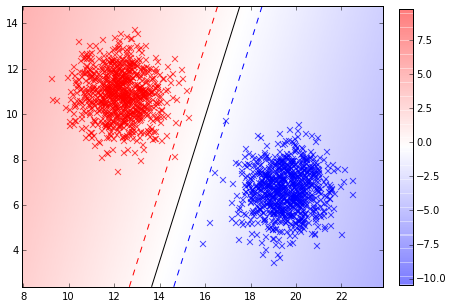

In [95]:
res = SVMmodule.svm_liblinear_solver(X, y, C, max_iter=4000)
SVMmodule.visualize(X, y, res['w0'], res['w'])

Решения найденные различными методами визуальных отличий друг от друга не имеют. Кроме решения, полученного с помощью библиотеки `liblinear`, так как в этом методе решается другая задача оптимизации (о чём уже говорилось в пункте 4.1)

### Решение, найденное методом qp_dual c RBF ядром

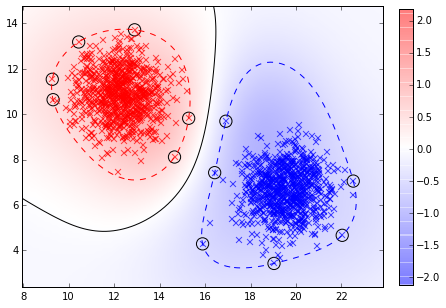

In [99]:
res = SVMmodule.svm_qp_dual_solver(X, y, C, gamma=gamma)
SVMmodule.visualize(X, y, res['w0'], res['w'], A=res['A'], gamma=gamma)

### Решение, найденное методом libsvm c RBF ядром

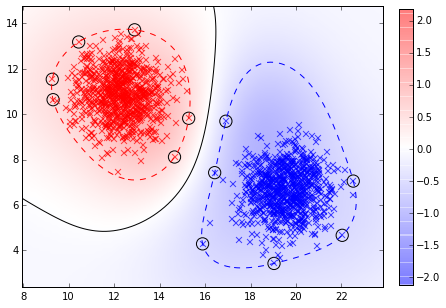

In [98]:
res = SVMmodule.svm_libsvm_solver(X, y, C, gamma=gamma)
SVMmodule.visualize(X, y, res['w0'], res['w'], A=res['A'], gamma=gamma)

В случае RBF ядра исследуемые методы находят одни и те же решения.

### Линейно неразделимая выборка

In [133]:
X, y = SVMmodule.generate_data(N, D, 0.58, seed=9876)

### Решение, найденное методом qp_dual

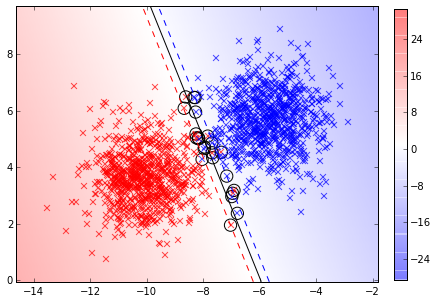

In [134]:
res = SVMmodule.svm_qp_dual_solver(X, y, C)
SVMmodule.visualize(X, y, res['w0'], res['w'], A=res['A'])

### Решение, найденное методом subgradient

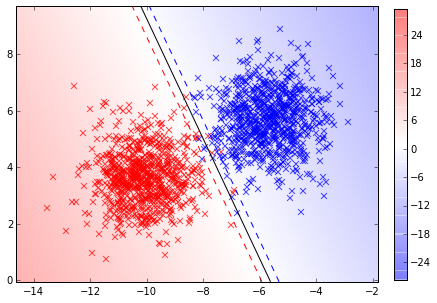

In [135]:
res = SVMmodule.svm_subgradient_solver(X, y, C, max_iter=4000)
SVMmodule.visualize(X, y, res['w0'], res['w'])

### Решение, найденное методом libsvm

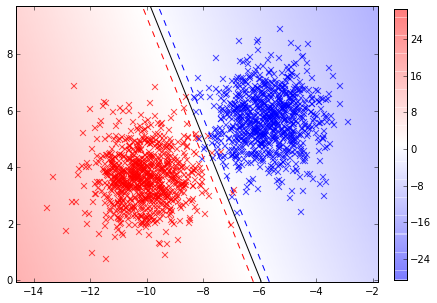

In [136]:
res = SVMmodule.svm_libsvm_solver(X, y, C, max_iter=4000)
SVMmodule.visualize(X, y, res['w0'], res['w'])

### Решение, найденное методом liblinear

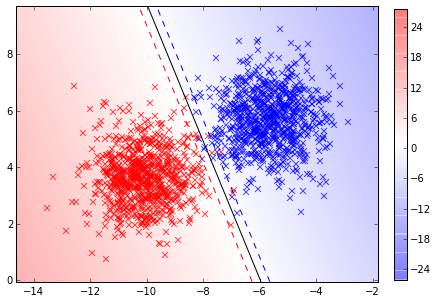

In [137]:
res = SVMmodule.svm_liblinear_solver(X, y, C, max_iter=4000)
SVMmodule.visualize(X, y, res['w0'], res['w'])

### Решение, найденное методом qp_dual c RBF ядром

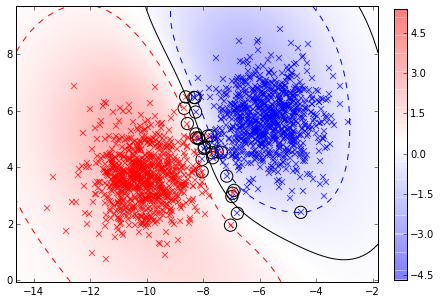

In [138]:
res = SVMmodule.svm_qp_dual_solver(X, y, C, gamma=gamma)
SVMmodule.visualize(X, y, res['w0'], res['w'], A=res['A'], gamma=gamma)

### Решение, найденное методом libsvm c RBF ядром

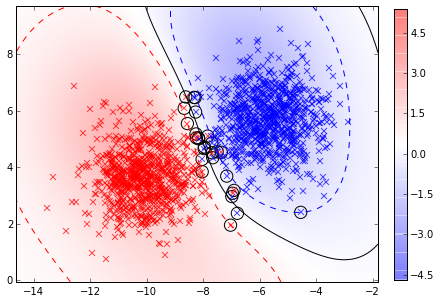

In [139]:
res = SVMmodule.svm_libsvm_solver(X, y, C, gamma=gamma, max_iter=4000)
SVMmodule.visualize(X, y, res['w0'], res['w'], A=res['A'], gamma=gamma)

---
### 5. Выводы

В рамках данной работы:

* Осуществлено знакомство с методом опорных векторов; 
* Реализованы несколько методов решения задачи SVM;
* Проведено исследование работы реализованных методов в зависимости от различных параметров;